# 1 Train: 0.003, Test: 0.009
# 2 Train: 0.001, Test: 0.004
# 3 Train: 0.000, Test: 0.002
# 4 Train: 0.000, Test: 0.001
# 5 Train: 0.000, Test: 0.001
# 6 Train: 0.000, Test: 0.000
# 7 Train: 0.000, Test: 0.000
# 8 Train: 0.000, Test: 0.000
# 9 Train: 0.000, Test: 0.000


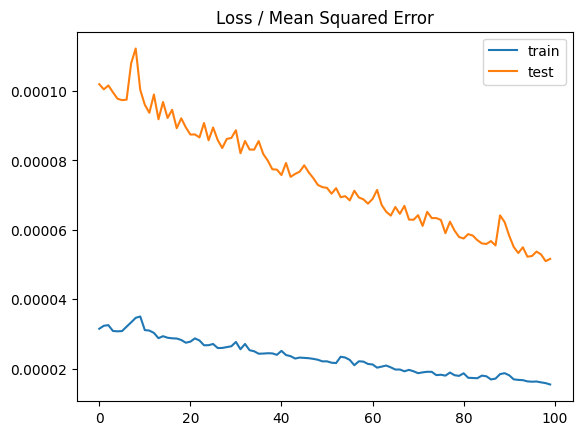

In [5]:
# Build a Multilayer Perceptron (MLP) model for regression with Mean Squared Error loss function 
# author: Wang Yong
# e-mail: dr.yongwang@hotmail.com
# created: 2023-11-10
# pair programming with Github Copilot and code snippet from 
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

# pip install scikit-learn, copilot help to import the packages needed in VS Code
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

# generate regression dataset
# X, y = make_regression(n_samples=100, n_features=1, noise=15)
X0, y0 = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset, why use the same name X and y after transformation ? Change the name to X1, y1, X2, y2, etc.
X = StandardScaler().fit_transform(X0) # fit_transform() will standardize the data
y = StandardScaler().fit_transform(y0.reshape(len(y0),1))[:,0] # reshape target to be a 1d array

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# A small Multilayer Perceptron (MLP) model will be defined to address this problem and provide the basis for exploring different loss functions.
# The model will expect 20 features as input as defined by the problem. The model will have one hidden layer with 25 nodes 
# and will use the rectified linear activation function (ReLU). The output layer will have 1 node, given the one real-value to be predicted, 
# and will use the linear activation function.

# define model
model = Sequential() # Sequential groups a linear stack of layers into a tf.keras.Model.
# Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function 
# passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer 
# (only applicable if use_bias is True).
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear'))
# opt = SGD(lr=0.01, momentum=0.9) # Stochastic gradient descent optimizer.
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt) # Configure a model for training.

for i in range(1,10):
# fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
    # evaluate the model
    train_mse = model.evaluate(trainX, trainy, verbose=0)
    test_mse = model.evaluate(testX, testy, verbose=0)
    print('#%2d Train: %.3f, Test: %.3f' % (i, train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

